# Exploration of the given data

In [1]:
import sys
sys.path.append(r"../")

from src.data.data_collector import add_to_combined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/raw/filtered.tsv', sep='\t', header=0)
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


## Analyze the dataframe

### Check columns and their types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


### Check values of the columns

In [7]:
df.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


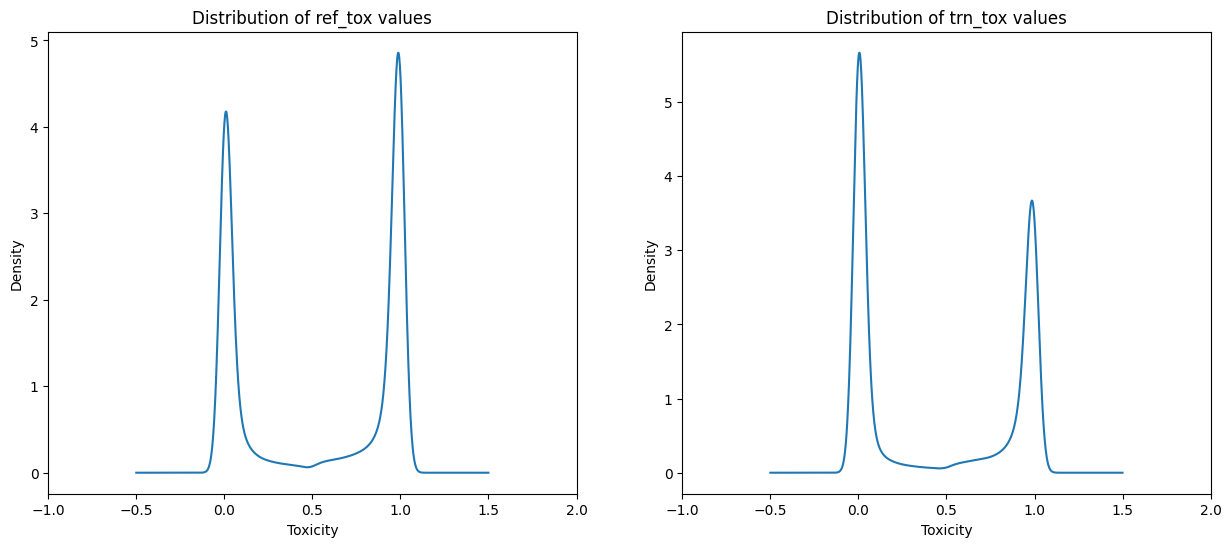

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
df['ref_tox'].plot(kind='density', ax=axs[0], xlim=(-1, 2))
axs[0].set_xlabel('Toxicity')
axs[0].set_title('Distribution of ref_tox values')

df['trn_tox'].plot(kind='density', ax=axs[1], xlim=(-1, 2))
axs[1].set_xlabel('Toxicity')
axs[1].set_title('Distribution of trn_tox values')

plt.show()


### Check for missing values

In [6]:
df.isnull().sum()

Unnamed: 0     0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64

### Change order of values in row (reference and translation) if ref_tox > trn_tox

In [7]:
df.loc[df['ref_tox'] < df['trn_tox'], ['reference', 'translation', 'ref_tox', 'trn_tox']] = \
    df.loc[df['ref_tox'] < df['trn_tox'], ['translation', 'reference', 'trn_tox', 'ref_tox']].values

In [8]:
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


### Modify dataset for training

In [9]:
df = df.rename(columns={"reference": "toxic-en", "translation": "neutral-en"})[['toxic-en', 'neutral-en']]
df.head()

,toxic-en,neutral-en
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t..."
1,you're becoming disgusting.,Now you're getting nasty.
2,"well, we can spare your life.","Well, we could spare your life, for one."
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it."
4,I have orders to kill her.,I've got orders to put her down.


### Add result to combined dataset (data/interim/combined.tsv)

In [10]:
print('Total combined size:', len(add_to_combined(df, is_initial=True)))

Total combined size: 577777
